# Introduction to Machine Learning
---
### Learning Objectives
- Data preprocessing 
    - normalization
    - create test and train subsets
    - fix random number generator for reproducibility
    
- Dimensionality reduction
    - PCA
    - UMAP
 
- Supervised Learning
    - Decision trees
    - classification performance evaluations
    
- Unsupervised Learning
    - k-means clustering
    - Quality metrics

In [131]:
# let's import the usual libraries and we import on spot as we need more
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The package we use for this lesson is `scikit-learn` machine learning package from which we will import needed libraries as we move forward. 

A classic machine learning application was the attempt to automatize the postal services to correctly read and sort every piece of mail by reading the zip code that the sender has written on the box. We use this case throught this lesson. 

We use [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, one of the classical examples of the application of machine learning. We use a subset of this dataset available through scikit-learn. This dataset contains 1797 scans of handwritten digits from 0 to 9. Each scan makes an 8 by 8 pixels image which is flattened to make a 1797 by 64 array. Since this is a dataset for machine learning experiments and not a real life problem, the correct reading of each image (i.e. row in the array) is already known and stored in the `target` array. Let's look at the data first.

### The dataset

In [132]:
# import the dataset
from sklearn import datasets
digits = datasets.load_digits()
#print(digits.DESCR)

In [2]:
# check the shape of the array
digits.data.shape

(1797, 64)

In [6]:
# what are the digits we have the images of
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

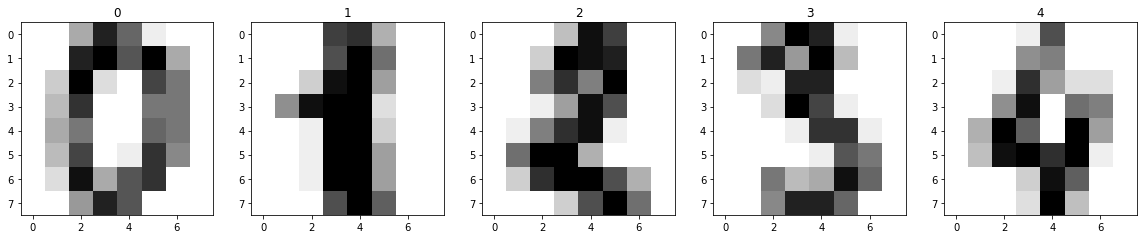

In [63]:
# visualize a few of the digit images (i.e. rows in the array)
# the first 5 images/rows:
fig, axes = plt.subplots(1,5, figsize=(20,10))
for i,ax in enumerate(axes):
    ax.imshow(digits.data[i].reshape(8,8), cmap='gray_r')
    ax.set_title(digits.target[i])

# note that the 8 * 8 version of the data is stored in digits.images, so you could also use
# ax.matshow(digits.images[i], cmap='gray_r')   

A few perprocessing on the dataset needed for machine learning:

#### Adjust scaling of the features 

An important preprocessing that usually should be done on the data before applying any machine learning algorithm is standardizing the dataset. (or use any other scaling such as MinMax Scaler)

For the specific digit dataset that we use here all the pixels in the 64 columns are integer values between 0 and 16, but this is not the case for all the dataset you may work with. 
Each column can be a feature with a completely different scaling, for example in the gapminder thatset that we have been working on in the past few lessons, one column can be populations in millions, and the other can be life expectancy in age range. We have to standardize the dataset's features onto unit scale, i.e. mean=0 and variance=1 (or other forms of normalizing), to warrranty optimal performance of our machine learning algorithms. 

If you want to read more, scikit-learn has a [section](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) on the effects of not standardizing your data.

In [81]:
# import the standardization libarary 
from sklearn.preprocessing import StandardScaler
# standardize
scaler = StandardScaler()
digits_data_scaled = scaler.fit_transform(digits.data)
# check the data is the same
digits_data_scaled.shape

(1797, 64)

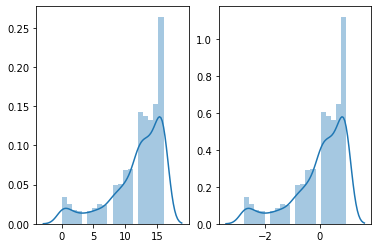

In [82]:
# and each column has the same distribution, but with moved mean
# here for example, we look at column 3
fig, (ax1,ax2) = plt.subplots(1,2)
sns.distplot(digits.data[:,3], ax=ax1)
sns.distplot(digits_data_scaled[:,3], ax=ax2);

#### Create test and training subsets
As we mentioned in the previous lecture, for classification purposes, it's best practice to train the data on a different dataset than the data we want to test the clasifier on. Otherwise, we will always get 100% accuracy rates!

In [135]:
from sklearn.model_selection import train_test_split
digits_train, digits_test, target_train, target_test = train_test_split(digits_data_scaled,
                                                                        digits.target, test_size=0.2)
print(digits_train.shape, digits_test.shape)

(1437, 64) (360, 64)


#### fix the random number generator 

We usually want to fix a random seed for consistency and reproducibility. 

In [69]:
np.random.seed(42)

Since the focus of this course is programming a workflow of machine learning algorithms, we limit the description of the concepts to short intros/reminders. 

## Machine Learning

There are two main types of learning schemes: 

- unsuprevised learning
    - clustering
- supervised learning, such as 
    - Regression 
    - classiffication

The main difference between unsupervised and supervised is the explicit knowledge about the output (aka the right answer): in supervised learning the dataset is labaled and the machine can use a direct error-based criterion to learn; in the unsupervised learning the machine has to identify pattern or strucutre based on indirect quality measures of learning. 

Note here that we can add other categories too: 
There is also `semi-supervised learning` where we have some of the labels which is the case with some large datasets. Or `Reinforcement learning` where the machine has to learn based on the reward that it gets from the environment for each action. 

### Dimensionality Reduction
Datasets in scientific commputation and machine learning usually have high dimensionality (e.g., images, videos, gene expression datasets, EEG). Feature selection and dimensionality reduction algorithms are used to 

- first, make visual assessment of the structure of the data and 
- second, to improve the performance of data-driven procedures, such as those for classification and clustering.

Let's learn how to code a classic algorithm: Principle component analysis `PCA`, and a recently developed algorithm Uniform Manifold Approximation and Projection, `UMAP`. 





#### PCA
By looking at the dataset we learned that each digit is represented by a 64 dimension vector, and it's this representation that is used by the machine to read and recognize the digits. But 64 dimensions is an overkill for such a task, and we hypothesize theat there should be some smaller number of "latent" features that would be sufficient to describe the data reasonably well. 

So let's plot the few first principle components of the data that describe most of the variance in the dataset. 

To use PCA we first construct a PCA object and then apply to the data using the `fit_transform` method. 

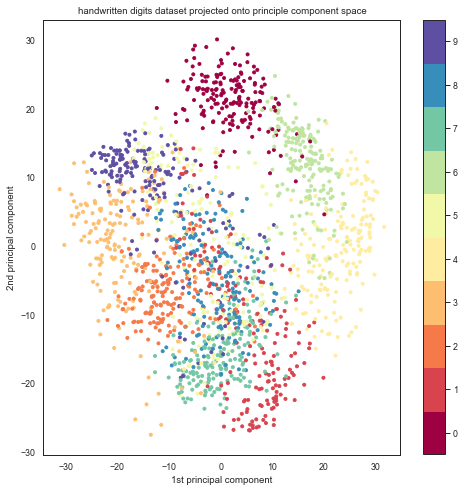

In [127]:
from sklearn.decomposition import PCA
pca = PCA() # you can preset the number of lower dimensions desired by n_components=2
PCs = pca.fit_transform(digits.data)

# since we already know the labels, we can color each dot
color = digits.target.astype(int)
fig, ax = plt.subplots(1,figsize=(8,8))
# we want to plot the first two Principle components
sns.set(context="paper", style="white")
plt.scatter(PCs[:,0],PCs[:,1], c=color, cmap="Spectral", s=10);
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
plt.title("handwritten digits dataset projected onto principle component space")


# plot a colorbar to identify each color corresponds to which number
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(color)

Here each dot is one observation or row, and you can see that all instances of each digit are mapped closeby and form a cluster, but if we didn't know the labels, which is the case in real-life problems, we (or the machine) couldn't distinguish the digits (the clusters) from each other. So let's try a more advanced dimensionality reduction technique, that is especially gaining popularity in biological research such as gene expression analysis. 

one small note before we move forward:
For visualization purposes, we don't want (or can) use more than 3 components (for publication even 2 is preferred). But in general use of dimensionality reduction techniques, we have to use a criteria that tells us how many dimensions are sufficient before we lose too much information about the data strucutre. 

In using PCA, we can compute the explained variance by each PC, and then use a threshold of acceptance, for example choose the number of components where 90% of the variance (i.e. information) in the data can be cumulatively explained. Or alternatively, define where to set the threshold from the plot of variance explained for PCs, by identifying the point where the curve drops most significantly (or in the case of cumulative variance explained plot, where the curve plateaus).

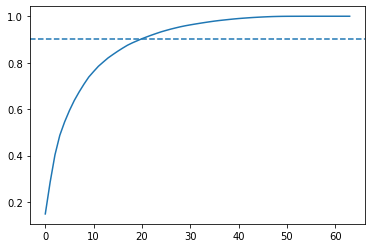

In [122]:
# compute the explained variance 
explained_var = pca.explained_variance_ratio_
# compute the cumulative variance for visualization 
cumexplained_var = np.cumsum(explained_var)
# plot
plt.plot(cumexplained_var)
plt.axhline(y=0.9, linestyle='--');

we can say from the plot, that from the 64 original dimensions, we can safely reduce the data to 20 without losing much information and impacting the results of any machine learning algorithms. This may not be dramatic for this dataset, but it is essential for big data applications. 

#### UMAP

UMAP is a non-linear dimension reduction algorithm derived from topological data analysis techniques. The algorithm first constructs a fuzzy representation of the distances between the data points (observations) in the original full dimensional space, and then it optimizes a low dimensional representation that as closely as possible follows the representation in the original space. 


Remember to install UMAP first by running `conda install -c conda-forge umap-learn` on your Anaconda portal. 

In the simplest form, using UMAP has two tasks similar to PCA: first to instantiate the UMAP class, and then train that object and fit the model to data. 

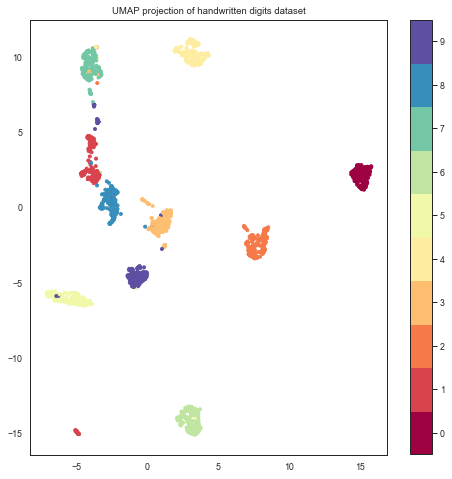

In [130]:
import umap


reducer = umap.UMAP();
embedding = reducer.fit_transform(digits.data)


fig, ax = plt.subplots(figsize=(8,8))
color = digits.target.astype(int)
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=10)
plt.title("UMAP projection of handwritten digits dataset")

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))

We observe that the UMAP projection gives bettter clarification of the digit clusters. The figure also shows that for example 0 and 1 that are two very distinc digits are far apart from each other, or 1 and 7 and 8 are closeby, which we know some people write these numbers very similar to each other. 


Of course, depending of the nature of the data, there are several hyper-parameters in UMAP you may want to set: `n_neighbors` (balances the size of the local vs global strucutre), `min_dist` (minimum allowed distance between points), `n_components` (how many lower dimensions you desire), `metric` (the distance metric: e.g. Euclidean).


One important parameter to set if you want your results to be reproducible is to set the random number generator. If you haven't set it already in your notebook, you can set in in UMAP by `random_state` parameter, for example: `reducer = umap.UMAP(random_state=42)`.

We encourage you to refer to UMAP documentation and paper to learn more deeply how it works. 

## Supervised learning: Decision Trees


Decision tree is a supervised learning algorithm. It can be used both for classification and regression. The algorithm predicts the target variable by learning simple  if-then-else  decision rules inferred from the data features (the columns in our dataset). If the target/predicted variable is the class (a discrete value) to which the observation belongs, the algorithm is a classification tree, and when the predicted variable is a real number it is a regression analysis. The metric that define the decision rule can be `Gini impurity` or `entropy`. 

The classification tree can be imported from the `tree` library as `DecisionTreeClassifier` and the regression tree can be called as `DecisionTreeRegressor`. The instantiating, training and prediction functions of the models are similar via `fit` and `predict` methods.  


Note: Random Forest algorithm is an ensemble approach to decision trees in which the algorithm creates decision trees on randomly selected data samples, get predictions from each tree and selects the best solution by means of voting. 

Note: This algorithm is non parametric and doesn't need the data to be nromalizaed (e.g. standardized). 


In [186]:
from sklearn import tree

In [187]:
# Decision Tree classification
classifier = tree.DecisionTreeClassifier()
classifier.fit(digits_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [188]:
classifier.score(digits_train, target_train)

1.0

In [201]:
target_predicted = classifier.predict(digits_test)

### Classification perfomance assessment
There are many metrics developed to assess the performance of classification algorithms. As an introduction we review sme basic metrics. 

#### Calssification accuracy

The `classification_report` in skitlearn shows the main classification metrics such as precision, accuracy, recall and f-1 score.
Accuracy is the fraction of the correct predictions, and precision is the ratio of true positive predictions to the total predicted positive predictions. Recall or sensitivity is the ratio of true positives to the all the observations in the actual class (true positivies + false negatives), and f1-score is a weighted average of precision and recall. 

You may have already noticed that these metrics are for binary classficiations. The extended format of such metrics treat the multiclass problems (such as the handwritten digits with 10 classes) as a collection of binary classes, averaging the binary metric calculations to get a measure across the set of classes. Parameters such as `macro` or `weigheted` identify whether a simple mean or a weighted mean is used. 


#### Confusion Matrix

Confusion matrix is a tool to visualize the performance of the classification by showing the correct and wrong predicted labels for each class. 
In a confusion matrix each row corresponds to a class based on the known labels, and the value in each cell c_ij is the number of observations actually in class i, but predicted to be in class j.


In [ ]:
from sklearn import metrics

In [227]:
# prediction report
print(metrics.classification_report(target_test,target_predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       0.92      0.85      0.88        40
           2       0.83      0.97      0.90        36
           3       0.61      0.61      0.61        23
           4       0.87      0.85      0.86        39
           5       0.91      0.94      0.92        31
           6       0.92      0.92      0.92        37
           7       0.84      0.95      0.89        39
           8       0.84      0.70      0.76        37
           9       0.88      0.79      0.84        48

    accuracy                           0.86       360
   macro avg       0.85      0.86      0.85       360
weighted avg       0.86      0.86      0.86       360



In [228]:
# confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
cm 

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  1,  1,  0,  1,  0,  1,  1,  1],
       [ 0,  0, 35,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  2,  3, 14,  0,  0,  0,  1,  1,  2],
       [ 2,  0,  0,  1, 33,  0,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 29,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 34,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1, 37,  0,  0],
       [ 1,  0,  2,  4,  0,  1,  0,  1, 26,  2],
       [ 0,  1,  1,  3,  1,  1,  0,  0,  3, 38]], dtype=int64)

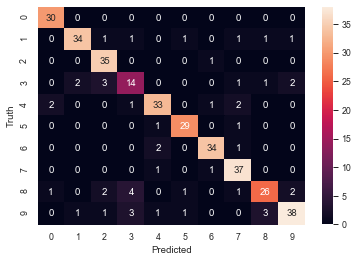

In [226]:
# better visualization of the confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

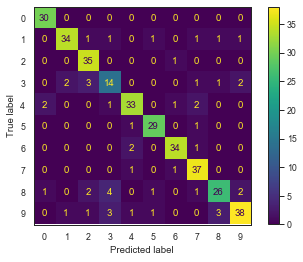

In [233]:
# note that we could directly plot the confusion matrix too
metrics.plot_confusion_matrix(classifier,digits_test,target_test);

#### Extra: 
##### ROC AUC: 
The Receiver Operating Characteristic plot is also anther performance measure that plots the true positive rate (sensitivity) against the false positive rate (1-specificity) is also used for binary classifications. 

The ROC Area Under the Curve (ROC AUC), however, can be used for our dataset, by defining the `multi_class` parameter. This is a measure from 0 (worst) to 1 (best) with a random guess scoring 0.5. 


In [ ]:
target_probs = classifier.predict_proba(digits_test)

metrics.roc_auc_score(target_test,target_probs, multi_class='ovr')

## Unsupervised learning: Kmeans clustering
K-means is a classic clustering algorithm that takes the assumed number of clusters (k) and assigns cluster labels to each data point based on minimizing the squared error between the datapoints and the centroids of the clusters.

to emphasise: you have to give the number of clusters, k, to the algorithm. So either the k is either predefined or we can set a loop to run the algorithm with several ks, evaluate performance with some quality metrics, and choose the k with the best performance. 
here we use our knowledge of the dataset being of 10 digits and set k = 10. This is done by setting `n_clusters` parameter. 


Like many algorithms, Kmeans is sensitive to what datapoint to choose as the start. It's best practice to run Kmeans multiple times with different centroid seeds and choose the best output. Hence, the Kmeans algorithm within sklearn has already implemented such iterative running of Kmeans which you can define with `n_init` parameter: the number of times the Kmeans algorithm will be run. 


Note: for our handwritten digits dataset, we know the output labels (i.e. the classes) but to examine the unsupervised learning algorithm k-means, we assume we don't have that knoweldege. you can note that the `data.target` is not used anywhere in the section below. 

In [172]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(init='k-means++', n_clusters=10, n_init=15) ##k-means++ is a version of kmeans with better convergence
model_kmeans.fit(digits_data_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Let's visualize the performance of Kmeans by coloring the datapoints in our UMAP figure by the assigned memberships by kmeans, instead of the ground truth labels 

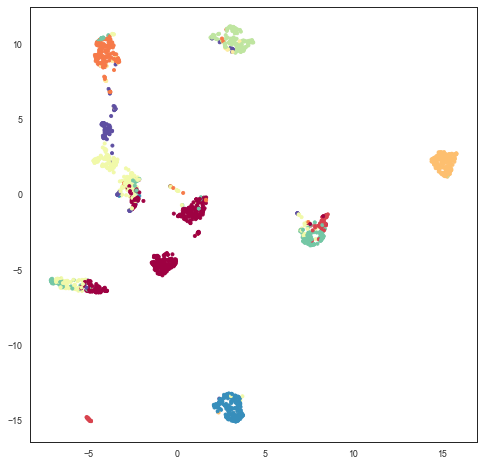

In [173]:
color = model_kmeans.labels_


fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=10)

# important note: why we didn't use the color bar here?
# the algorithm doesn't have a notion of the target digits, so the 0 to 9 that it assigns to the clusters 
# won't necessary be the digits that they represents. They are rather arbitraty labels 
# (that could as well be names like apple, orange, banana) 

We can observe that the performance is poor (i.e. the Kmeans partitions doesn't fall on the clusters of digits visualized by UMAP). It's always nice to visualize the resutls, but at the end, we have to quantify the perfromance:

### Quality metrics
#### Silhouette
There are multiple quality metrics developed to evaluate the resutls of clustering algorithms, here we look at the silhouette coefficient which is a measure of how similar a data point is to the other members of it's own clusters compared to its similarity to all other data points (similarity measured by a distance metric such as Euclidean distance). 

Silhouette measure for each data point can be between 1 and -1, and the closer to 1 is an indication of better clustering. 

#### Adjusted Rand Index (ARI)
If we have the ground truth, i.e. the labels, we can validate the performance by external criteria such as ARI, which quantify the agreement between computed partitions and the ground truth partitions. 

The ARI
is also a max-optimal index in the sense that larger values imply a better match between the
ground truth and the results of the clustering.

In [234]:
# the same metric library
# from sklearn import metrics

In [182]:
# Silhoutte 

metrics.silhouette_score(digits_data_scaled, labels=model_kmeans.labels_)

0.146926870815868

In [184]:
# ARI

metrics.adjusted_rand_score(digits.target,model_kmeans.labels_)

0.46835523306662125

In [185]:
metrics.adjusted_rand_score(digits.target,model.labels_)

0.6687022441283675

### Extra: 
We noted that for big data a reduced version of the data may be more preferrable to feed into any of the algorithms. 

Although 64 dimensions is not really 'big', we could apply Kmeans to the first 20 principle components instead of the full 64 dimension array.

In [235]:
PCs = pca.fit_transform(digits.data)


model = KMeans(init='k-means++', n_clusters=10, n_init=25) ##k-means++ is a version of kmeans with better convergence
model.fit(PCs[:,:20])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

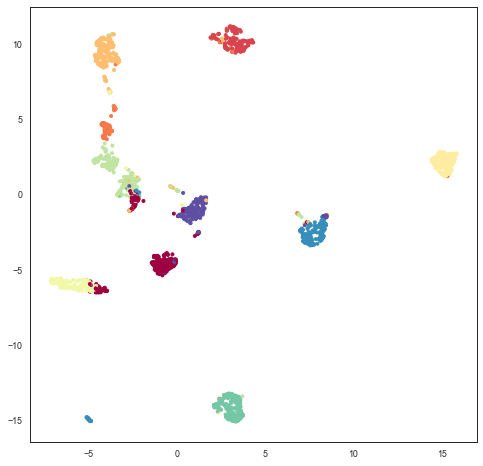

In [236]:
color = model.labels_


fig, ax = plt.subplots(figsize=(8,8))
#plt.scatter(PCs[:,0],PCs[:,1], c=color, cmap="Spectral", s=10);
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=10)